<a href="https://colab.research.google.com/github/lauradela/telecomX_challengeONE/blob/main/telecomX_challengeONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
#com essa linha eu acesso o arquivo json para começar a extrair os dados da API
response = requests.get(url)
if response.status_code == 200:
  #aqui é uma variavel, não tem que ser estruturada
    dados = response.json()
    # aqui é um daraframe que pode ser exportado e tem estrutura de tabela
    df = pd.DataFrame(dados)
    print(df.head())
else:
  print ("Erro na requisição", response.status_code)
  #chamei o arquivo do github

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [4]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


Normalização dos dados

In [5]:
# 1. Expandindo as colunas com dicionários,transformando cada coluna(normalizando)
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# 2. Juntando tudo num único DataFrame final# df_final = pd.concat() estou salvando temporariamente , preciso salvar em disco
df_final = pd.concat(
    [df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account],
    axis=1
)

In [6]:
# Salvando o DataFrame df_final em um arquivo CSV
df_final.to_csv('df_final.csv', index=False)

In [7]:
# conferindo o resultado:
df_final = pd.read_csv('df_final.csv')
df_final.head()
#como ficou o dataframe df_final depois de expandir os dicionarios

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Limpeza e Tratamento dos Dados

In [8]:
# se informando sobre o arquivo
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
# Charges.Total     7267 non-null   object ,aqui está como object, e ele  é numerico : fazendo a correção:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [10]:
##revisando as trocas de informações
df_final.info()
# as 2 últimas linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
# removendo dados ausentes
df_final = df_final.dropna(subset=['Churn', 'Charges.Total'])

In [12]:
# removendo strings vazias
df_final.replace('', np.nan, inplace=True)

In [13]:
# verificando os valores nulos
df_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [14]:
df_final.drop('customerID', axis=1, inplace=True)
# removi a coluna customer id

In [ ]:
df_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [15]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [16]:
# # quantidade de clientes por categoria
print(df_final['Churn'].value_counts(dropna=False))

Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [17]:

counts = df_final['Churn'].value_counts(dropna=False)
percentages = df_final['Churn'].value_counts(normalize=True).mul(100).round(2)

result = pd.DataFrame({'Quantidade': counts, 'Porcentagem (%)': percentages})
print("Resumo de Churn:\n", result)

Resumo de Churn:
        Quantidade  Porcentagem (%)
Churn                             
No           5163            73.42
Yes          1869            26.58


In [18]:
# quantidade de cliente em percentagem
print(df_final['Churn'].value_counts(normalize=True))

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


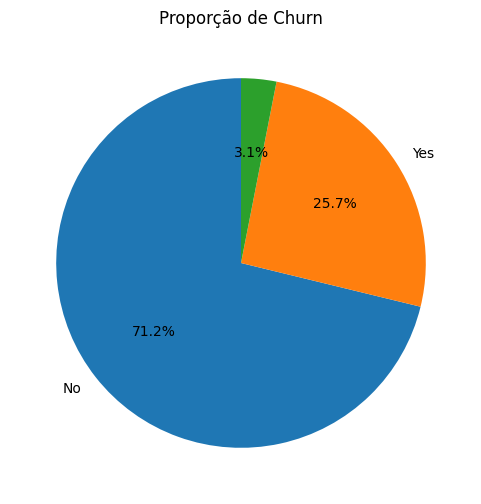

In [19]:
df_temp = df.copy()
df_temp['Churn'] = df_temp['Churn'].fillna('Desconhecido')

df_temp['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6, 6),
    title='Proporção de Churn'
)
plt.ylabel('')
plt.show()


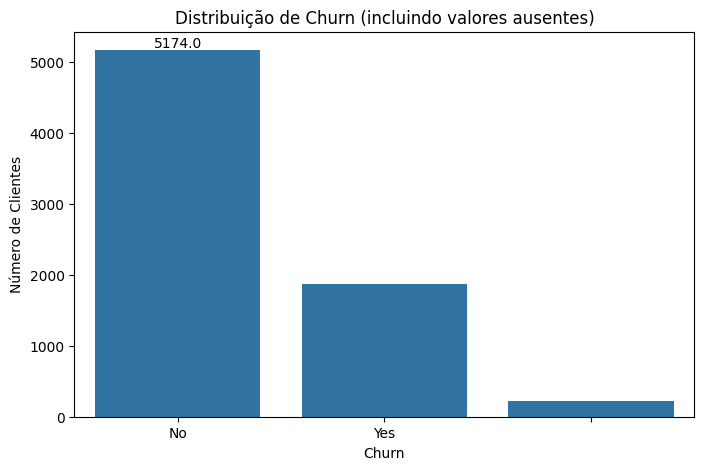

In [20]:
df_temp = df.copy()
df_temp['Churn'] = df_temp['Churn'].fillna('Desconhecido')

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_temp, x='Churn')
plt.title('Distribuição de Churn (incluindo valores ausentes)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')

# Adiciona os números em cima das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')
    plt.show()

In [21]:
df_temp = df.copy()

In [22]:
print(df_final['Churn'].unique())


['No' 'Yes']


In [23]:
print(df_final['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64


5398 clientes permaneceram (não evadiram)

1869 clientes saíram (deram churn)

In [24]:
total_clientes = len(df_final)
contagem_churn = df_final['Churn'].value_counts()

# Pega valores absolutos
clientes_permaneceram = contagem_churn.get('No', 0)
clientes_churn = contagem_churn.get('Yes', 0)

# Calcula porcentagens
pct_permaneceram = (clientes_permaneceram / total_clientes) * 100
pct_churn = (clientes_churn / total_clientes) * 100

print(f"Do total de {total_clientes} clientes analisados,")
print(f"{clientes_permaneceram} ({pct_permaneceram:.1f}%) permaneceram (não evadiram),")
print(f"enquanto {clientes_churn} ({pct_churn:.1f}%) saíram (deram churn).")


Do total de 7032 clientes analisados,
5163 (73.4%) permaneceram (não evadiram),
enquanto 1869 (26.6%) saíram (deram churn).


In [25]:
# preciso saber qual o serviço mais procurado
servicos = ['PhoneService', 'MultipleLines', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Dicionário para guardar os resultados
servico_counts = {}

for servico in servicos:
    count_yes = df_final[df_final[servico] == 'Yes'].shape[0]
    servico_counts[servico] = count_yes

    # criei um DataFrame e ordenar (análise/visualização)
df_servicos = pd.DataFrame.from_dict(servico_counts, orient='index', columns=['Quantidade'])
df_servicos = df_servicos.sort_values('Quantidade', ascending=False)
print(df_servicos)

# Transformei em DataFrame e ordenei

                  Quantidade
PhoneService            6352
MultipleLines           2967
StreamingMovies         2731
StreamingTV             2703
OnlineBackup            2425
DeviceProtection        2418
TechSupport             2040
OnlineSecurity          2015


<ipython-input-26-4249985612>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_servicos.index, y='Quantidade', data=df_servicos, palette='viridis')


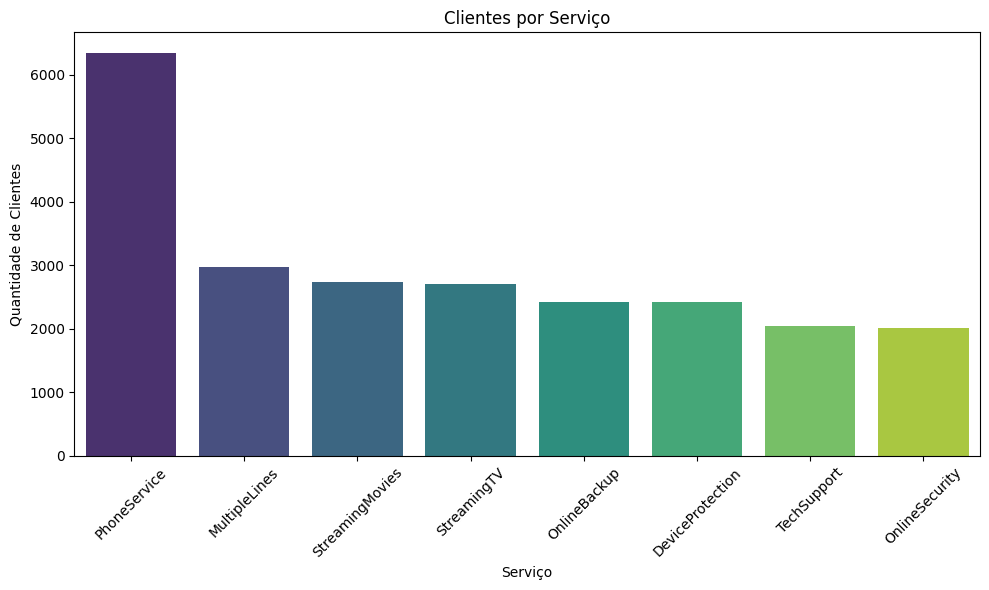

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_servicos.index, y='Quantidade', data=df_servicos, palette='viridis')
plt.xticks(rotation=45)
plt.title('Clientes por Serviço')
plt.xlabel('Serviço')
plt.ylabel('Quantidade de Clientes')
plt.tight_layout()
plt.show()

In [27]:
 # analizando o tenure
df_final['tenure'].max()

72

In [28]:
df_final['tenure'].describe()
#pedi uma descrição sobre este periodo

,tenure
count,7032.000000
mean,32.421786
std,24.545260
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


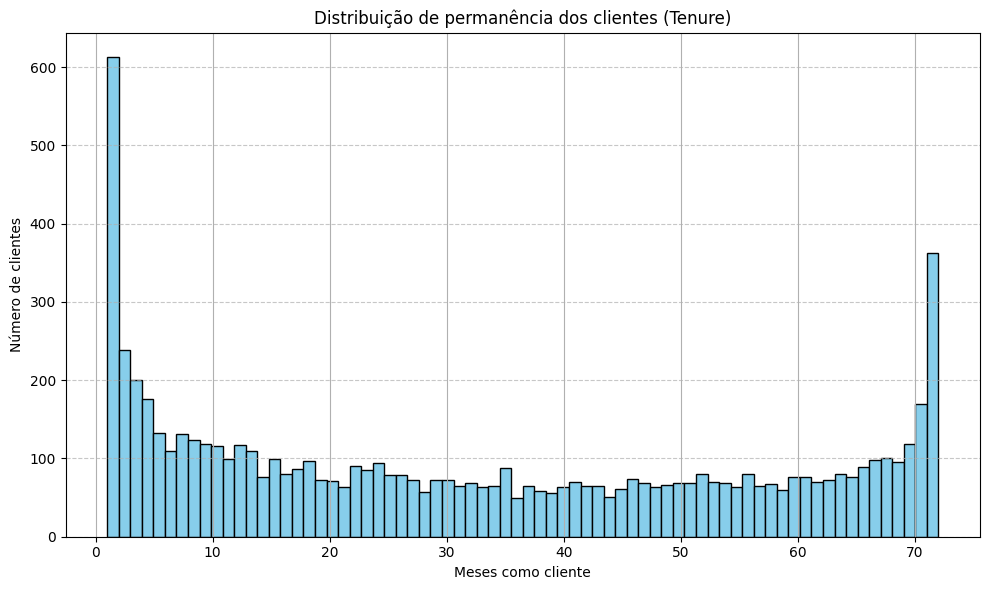

In [29]:
plt.figure(figsize=(10, 6))
df_final['tenure'].hist(bins=72, color='skyblue', edgecolor='black')
plt.xlabel('Meses como cliente')
plt.ylabel('Número de clientes')
plt.title('Distribuição de permanência dos clientes (Tenure)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


O gráfico acima mostra claramente que a maioria dos cancelamentos ocorre no primeiro mês de uso do serviço. A altura da barra no mês 1 revela um alto índice de evasão imediata, indicando **possíveis falhas na experiência inicial** **do cliente**. Já os meses finais demonstram que apenas uma pequena parcela atinge longos períodos de fidelização, reforçando que a retenção inicial** é um ponto crítico a ser melhorado.**

In [30]:
print(df_final['tenure'].unique())

[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]


In [31]:
tenure_zero = df_final[df_final['tenure'] == 0]
print(f"Número de clientes com tenure = 0: {len(tenure_zero)}")

Número de clientes com tenure = 0: 0


In [32]:
tenure_zero.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [33]:
tenure_zero = df_final[df_final['tenure'] == 0]
print("Antes da limpeza:")
print(f"Número de clientes com tenure = 0: {len(tenure_zero)}")

# Verifiquei valores faltantes
print("Valores faltantes em 'Churn' para tenure=0:", tenure_zero['Churn'].isnull().sum())
print("Valores faltantes em 'Charges.Total' para tenure=0:", tenure_zero['Charges.Total'].isnull().sum())


Antes da limpeza:
Número de clientes com tenure = 0: 0
Valores faltantes em 'Churn' para tenure=0: 0
Valores faltantes em 'Charges.Total' para tenure=0: 0


In [34]:
# vendo quem tem ou não servico telefonico
df_final['PhoneService'].describe()

,PhoneService
count,7032
unique,2
top,Yes
freq,6352


In [35]:
df_final['PhoneService'].value_counts()
df_final['PhoneService'].value_counts(normalize=True)  # porcentagem


,proportion
PhoneService,
Yes,0.903299
No,0.096701


In [36]:
print(df_final['PhoneService'].value_counts())


PhoneService
Yes    6352
No      680
Name: count, dtype: int64


In [37]:
print(df_final['PhoneService'].value_counts(normalize=True) * 100)


PhoneService
Yes    90.32992
No      9.67008
Name: proportion, dtype: float64


In [38]:
# Número total de clientes com PhoneService = 'Yes'
total_phone = df_final[df_final['PhoneService'] == 'Yes'].shape[0]

# Número de clientes com PhoneService = 'Yes' que evadiram (Churn == 'Yes')
evadiram_phone = df_final[(df_final['PhoneService'] == 'Yes') & (df_final['Churn'] == 'Yes')]
num_evadiram = evadiram_phone.shape[0]

# Percentual de evasão entre os que têm PhoneService
percentual_evasao = (num_evadiram / total_phone) * 100

print(f"Número de clientes com PhoneService que evadiram: {num_evadiram}")
print(f"Percentual de evasão entre clientes com PhoneService: {percentual_evasao:.2f}%")


Número de clientes com PhoneService que evadiram: 1699
Percentual de evasão entre clientes com PhoneService: 26.75%


In [39]:
# Filtrar clientes com PhoneService = 'Yes' e MultipleLines = 'No'
df_phone_only = df_final[(df_final['PhoneService'] == 'Yes') & (df_final['MultipleLines'] == 'No')]

# Quantidade que deram churn
churn_count = df_phone_only[df_phone_only['Churn'] == 'Yes'].shape[0]

# Total de clientes com PhoneService e sem MultipleLines
total = df_phone_only.shape[0]

# Porcentagem de churn nesse grupo
churn_percent = (churn_count / total) * 100

print(f"Número de clientes com PhoneService e sem MultipleLines que evadiram: {churn_count}")
print(f"Percentual de evasão nesse grupo: {churn_percent:.2f}%")


Número de clientes com PhoneService e sem MultipleLines que evadiram: 849
Percentual de evasão nesse grupo: 25.08%


In [40]:
print(df_final['MultipleLines'].describe())

count     7032
unique       3
top         No
freq      3385
Name: MultipleLines, dtype: object


In [ ]:
# Filtrar apenas clientes com PhoneService (para análise de MultipleLines)
df_multilines_valid = df_final[df_final['PhoneService'] == 'Yes']


In [ ]:
print(df_multilines_valid['MultipleLines'].value_counts())
print(df_multilines_valid['MultipleLines'].value_counts(normalize=True) * 100)


MultipleLines
No     3385
Yes    2967
Name: count, dtype: int64
MultipleLines
No     53.290302
Yes    46.709698
Name: proportion, dtype: float64


In [41]:
df_final['InternetService'].describe()



,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


In [44]:
# esse codigo é para filtrar os clientes que tem serviço de internet
# sem mais nenhum serviço opcional
#Lista dos serviços adicionais que queremos garantir que o cliente NÃO tenha
servicos_adicionais = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Filtrar clientes que têm internet (qualquer tipo diferente de 'No')
clientes_internet = df_final[df_final['InternetService'] != 'No']

# Agora, filtrar clientes que NÃO têm nenhum serviço adicional (todos os serviços = 'No')
clientes_somente_internet = clientes_internet[
    (clientes_internet[servicos_adicionais] == 'No').all(axis=1)
]

print(f"Número de clientes com somente Internet e sem serviços adicionais: {clientes_somente_internet.shape[0]}")
print(clientes_somente_internet.head())


Número de clientes com somente Internet e sem serviços adicionais: 693
   Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
12    No  Female              0     Yes         No       5          Yes   
17    No  Female              1      No         No       1          Yes   
19   Yes    Male              1      No         No       1           No   
40    No    Male              0     Yes        Yes      27          Yes   
49    No    Male              0      No         No       1          Yes   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
12                No     Fiber optic             No           No   
17               Yes     Fiber optic             No           No   
19  No phone service             DSL             No           No   
40               Yes     Fiber optic             No           No   
49                No             DSL             No           No   

   DeviceProtection TechSupport StreamingTV StreamingMovies        Co

In [43]:
# Lista dos serviços adicionais
servicos_adicionais = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies']

# Filtrar clientes que têm internet (diferente de 'No')
clientes_internet = df_final[df_final['InternetService'] != 'No']

# Aplicar o filtro diretamente em clientes_internet
clientes_somente_internet = clientes_internet[
    (clientes_internet[servicos_adicionais] == 'No').all(axis=1)
]

print(f"Número de clientes com somente Internet e sem serviços adicionais: {clientes_somente_internet.shape[0]}")
print(clientes_somente_internet.head())


Número de clientes com somente Internet e sem serviços adicionais: 693
   Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
12    No  Female              0     Yes         No       5          Yes   
17    No  Female              1      No         No       1          Yes   
19   Yes    Male              1      No         No       1           No   
40    No    Male              0     Yes        Yes      27          Yes   
49    No    Male              0      No         No       1          Yes   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
12                No     Fiber optic             No           No   
17               Yes     Fiber optic             No           No   
19  No phone service             DSL             No           No   
40               Yes     Fiber optic             No           No   
49                No             DSL             No           No   

   DeviceProtection TechSupport StreamingTV StreamingMovies        Co

In [45]:
# percentual de clientes somente com internet sem nenhum adicional
servicos_adicionais = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies']

# Clientes com qualquer tipo de Internet (exclui 'No')
clientes_internet = df_final[df_final['InternetService'] != 'No']

# Clientes que não usam nenhum serviço adicional
clientes_somente_internet = clientes_internet[
    (clientes_internet[servicos_adicionais] == 'No').all(axis=1)
]

# Porcentagem
percent_somente_internet = (clientes_somente_internet.shape[0] / clientes_internet.shape[0]) * 100

print(f"Número de clientes com somente Internet: {clientes_somente_internet.shape[0]}")
print(f"Total de clientes com Internet: {clientes_internet.shape[0]}")
print(f"Percentual de clientes com somente Internet: {percent_somente_internet:.2f}%")


Número de clientes com somente Internet: 693
Total de clientes com Internet: 5512
Percentual de clientes com somente Internet: 12.57%


In [46]:
# Lista de serviços adicionais
servicos_adicionais = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Filtrar clientes que têm algum serviço de Internet
clientes_internet = df_final[df_final['InternetService'] != 'No']

# Filtrar apenas quem não possui nenhum dos serviços adicionais
clientes_somente_internet = clientes_internet[
    (clientes_internet[servicos_adicionais] == 'No').all(axis=1)
]

# Verificar quantos desses deram churn
clientes_internet_churn = clientes_somente_internet[clientes_somente_internet['Churn'] == 'Yes']

# Número e percentual
numero_churn = clientes_internet_churn.shape[0]
total_somente_internet = clientes_somente_internet.shape[0]
percentual_churn = (numero_churn / total_somente_internet) * 100

print(f"Número de clientes com somente Internet que evadiram: {numero_churn}")
print(f"Percentual de evasão nesse grupo: {percentual_churn:.2f}%")


Número de clientes com somente Internet que evadiram: 362
Percentual de evasão nesse grupo: 52.24%


In [47]:
# Lista de serviços adicionais de internet
servicos_adicionais = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies']

# Contar quantos clientes têm cada serviço (valor == 'Yes')
servico_uso = {}
for servico in servicos_adicionais:
    count = df_final[df_final[servico] == 'Yes'].shape[0]
    servico_uso[servico] = count

# Transformar em DataFrame para visualização
df_uso_servicos = pd.DataFrame.from_dict(servico_uso, orient='index', columns=['Quantidade'])
df_uso_servicos = df_uso_servicos.sort_values('Quantidade', ascending=False)

# Exibir resultado
print(df_uso_servicos)


                  Quantidade
StreamingMovies         2731
StreamingTV             2703
OnlineBackup            2425
DeviceProtection        2418
TechSupport             2040
OnlineSecurity          2015


In [48]:
servicos_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies']

# Criar dicionário com a taxa de churn por serviço
churn_por_servico = {}

for servico in servicos_internet:
    total = df_final[df_final[servico] == 'Yes'].shape[0]
    churn = df_final[(df_final[servico] == 'Yes') & (df_final['Churn'] == 'Yes')].shape[0]
    taxa = (churn / total) * 100 if total > 0 else 0
    churn_por_servico[servico] = round(taxa, 2)

# Transformar em DataFrame
df_churn_servicos = pd.DataFrame.from_dict(churn_por_servico, orient='index', columns=['% Evasão'])
df_churn_servicos = df_churn_servicos.sort_values(by='% Evasão', ascending=False)

print(df_churn_servicos)


                  % Evasão
StreamingTV          30.11
StreamingMovies      29.95
DeviceProtection     22.54
OnlineBackup         21.57
TechSupport          15.20
OnlineSecurity       14.64


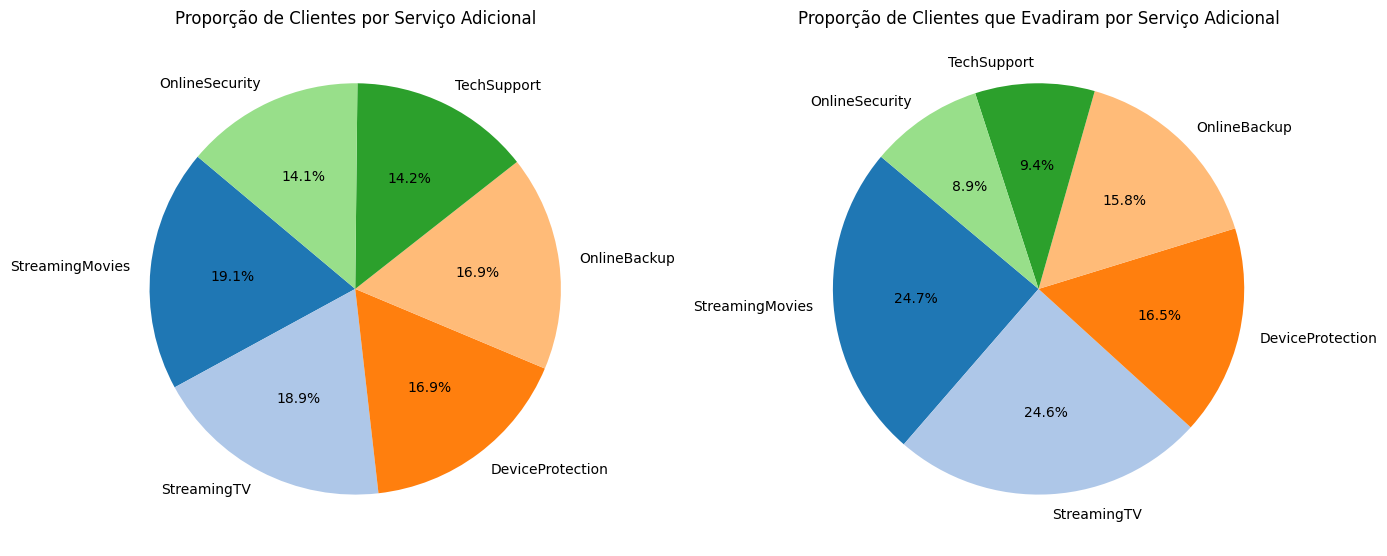

In [49]:
# Dados de procura (quantidade de clientes)
servicos = ['StreamingMovies', 'StreamingTV', 'DeviceProtection', 'OnlineBackup', 'TechSupport', 'OnlineSecurity']
quantidade = [2731, 2703, 2418, 2425, 2040, 2015]

# Dados de evasão (em número absoluto, calculado pela taxa de evasão * quantidade / 100)
evasao_percentual = [29.95, 30.11, 22.54, 21.57, 15.20, 14.64]
evasao_numeros = [int(q * p / 100) for q, p in zip(quantidade, evasao_percentual)]

# Cores para os gráficos
colors = plt.cm.tab20.colors

fig, axs = plt.subplots(1, 2, figsize=(14,7))

# Pizza da procura
axs[0].pie(quantidade, labels=servicos, autopct='%1.1f%%', startangle=140, colors=colors)
axs[0].set_title('Proporção de Clientes por Serviço Adicional')

# Pizza da evasão
axs[1].pie(evasao_numeros, labels=servicos, autopct='%1.1f%%', startangle=140, colors=colors)
axs[1].set_title('Proporção de Clientes que Evadiram por Serviço Adicional')

plt.tight_layout()
plt.show()


In [50]:
# Filtrar clientes que têm internet (excluindo 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Crosstab de InternetService x Churn, com percentual dentro de cada tipo de internet (DSL e Fiber optic)
internet_churn = pd.crosstab(df_internet['InternetService'], df_internet['Churn'], normalize='index') * 100

print(internet_churn)

# Mostrar só a taxa de evasão (coluna 'Yes')
evasao_por_internet = internet_churn['Yes']
print("\nPercentual de evasão por tipo de Internet (clientes com internet):")
print(evasao_por_internet)


Churn                   No        Yes
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765

Percentual de evasão por tipo de Internet (clientes com internet):
InternetService
DSL            18.998344
Fiber optic    41.892765
Name: Yes, dtype: float64


In [51]:
df_final['OnlineSecurity'].describe()

,OnlineSecurity
count,7032
unique,3
top,No
freq,3497


In [53]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de OnlineSecurity só para clientes com internet
print("Valores únicos de OnlineSecurity para clientes com internet:")
print(df_internet['OnlineSecurity'].unique())

# Mostrar contagem de cada valor em OnlineSecurity, para clientes com internet
print("\nContagem de OnlineSecurity entre clientes com internet:")
print(df_internet['OnlineSecurity'].value_counts())




Valores únicos de OnlineSecurity para clientes com internet:
['No' 'Yes']

Contagem de OnlineSecurity entre clientes com internet:
OnlineSecurity
No     3497
Yes    2015
Name: count, dtype: int64


In [54]:
#calcular taxa de churn para clientes com e sem OnlineSecurity
churn_por_security = pd.crosstab(df_internet['OnlineSecurity'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por OnlineSecurity (clientes com internet):")
print(churn_por_security)


Percentual de churn por OnlineSecurity (clientes com internet):
Churn                  No        Yes
OnlineSecurity                      
No              58.221333  41.778667
Yes             85.359801  14.640199


In [ ]:
df_final['OnlineSecurity'].describe()

,OnlineSecurity
count,7032
unique,3
top,No
freq,3497


In [55]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de DeviceProtection para clientes com internet
print("Valores únicos de DeviceProtection para clientes com internet:")
print(df_internet['DeviceProtection'].unique())

# Mostrar contagem de cada valor em DeviceProtection para clientes com internet
print("\nContagem de DeviceProtection entre clientes com internet:")
print(df_internet['DeviceProtection'].value_counts())

# Calcular percentual de churn por DeviceProtection (para clientes com internet)
churn_por_device = pd.crosstab(df_internet['DeviceProtection'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por DeviceProtection (clientes com internet):")
print(churn_por_device)


Valores únicos de DeviceProtection para clientes com internet:
['No' 'Yes']

Contagem de DeviceProtection entre clientes com internet:
DeviceProtection
No     3094
Yes    2418
Name: count, dtype: int64

Percentual de churn por DeviceProtection (clientes com internet):
Churn                    No        Yes
DeviceProtection                      
No                60.859729  39.140271
Yes               77.460711  22.539289


In [ ]:
df_final['OnlineBackup'].describe()

,OnlineBackup
count,7032
unique,3
top,No
freq,3087


In [60]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de OnlineBackup para clientes com internet
print("Valores únicos de OnlineBackup para clientes com internet:")
print(df_internet['OnlineBackup'].unique())

# Mostrar contagem de cada valor em OnlineBackup para clientes com internet
print("\nContagem de OnlineBackup entre clientes com internet:")
print(df_internet['OnlineBackup'].value_counts())

# Calcular percentual de churn por OnlineBackup (para clientes com internet)
churn_por_onlinebackup = pd.crosstab(df_internet['OnlineBackup'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por OnlineBackup (clientes com internet):")
print(churn_por_onlinebackup)


Valores únicos de OnlineBackup para clientes com internet:
['Yes' 'No']

Contagem de OnlineBackup entre clientes com internet:
OnlineBackup
No     3087
Yes    2425
Name: count, dtype: int64

Percentual de churn por OnlineBackup (clientes com internet):
Churn                No        Yes
OnlineBackup                      
No            60.058309  39.941691
Yes           78.432990  21.567010


In [71]:
# verificando se Techsupport funciona para PhoneService
# Mostrar valores únicos das duas colunas para ver possíveis combinações
print(df_final[['PhoneService', 'TechSupport']].drop_duplicates())

# Contar quantos clientes têm cada combinação de PhoneService e TechSupport
contagem = df_final.groupby(['PhoneService', 'TechSupport']).size()
print(contagem)


   PhoneService          TechSupport
0           Yes                  Yes
1           Yes                   No
10           No                  Yes
19           No                   No
20          Yes  No internet service
PhoneService  TechSupport        
No            No                      393
              Yes                     287
Yes           No                     3079
              No internet service    1520
              Yes                    1753
dtype: int64


In [ ]:
df_final['TechSupport'].describe()

,TechSupport
count,7032
unique,3
top,No
freq,3472


In [72]:
df_final['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [59]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de TechSupport para clientes com internet
print("Valores únicos de TechSupport para clientes com internet:")
print(df_internet['TechSupport'].unique())

# Mostrar contagem de cada valor em TechSupport para clientes com internet
print("\nContagem de TechSupport entre clientes com internet:")
print(df_internet['TechSupport'].value_counts())

# Calcular percentual de churn por TechSupport (para clientes com internet)
churn_por_techsupport = pd.crosstab(df_internet['TechSupport'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por TechSupport (clientes com internet):")
print(churn_por_techsupport)


Valores únicos de TechSupport para clientes com internet:
['Yes' 'No']

Contagem de TechSupport entre clientes com internet:
TechSupport
No     3472
Yes    2040
Name: count, dtype: int64

Percentual de churn por TechSupport (clientes com internet):
Churn               No        Yes
TechSupport                      
No           58.352535  41.647465
Yes          84.803922  15.196078


In [73]:
df_final['DeviceProtection'].describe()

,DeviceProtection
count,7032
unique,3
top,No
freq,3094


In [74]:
df_final['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [75]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de DeviceProtection para clientes com internet
print("Valores únicos de DeviceProtection para clientes com internet:")
print(df_internet['DeviceProtection'].unique())

# Mostrar contagem de cada valor em DeviceProtection para clientes com internet
print("\nContagem de DeviceProtection entre clientes com internet:")
print(df_internet['DeviceProtection'].value_counts())

# Calcular percentual de churn por DeviceProtection (para clientes com internet)
churn_por_deviceprotection = pd.crosstab(df_internet['DeviceProtection'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por DeviceProtection (clientes com internet):")
print(churn_por_deviceprotection)

Valores únicos de DeviceProtection para clientes com internet:
['No' 'Yes']

Contagem de DeviceProtection entre clientes com internet:
DeviceProtection
No     3094
Yes    2418
Name: count, dtype: int64

Percentual de churn por DeviceProtection (clientes com internet):
Churn                    No        Yes
DeviceProtection                      
No                60.859729  39.140271
Yes               77.460711  22.539289


In [76]:
df_final['StreamingTV'].describe()

,StreamingTV
count,7032
unique,3
top,No
freq,2809


In [61]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de StreamingTV para clientes com internet
print("Valores únicos de StreamingTV para clientes com internet:")
print(df_internet['StreamingTV'].unique())

# Mostrar contagem de cada valor em StreamingTV para clientes com internet
print("\nContagem de StreamingTV entre clientes com internet:")
print(df_internet['StreamingTV'].value_counts())

# Calcular percentual de churn por StreamingTV (para clientes com internet)
churn_por_streamingtv = pd.crosstab(df_internet['StreamingTV'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por StreamingTV (clientes com internet):")
print(churn_por_streamingtv)


Valores únicos de StreamingTV para clientes com internet:
['Yes' 'No']

Contagem de StreamingTV entre clientes com internet:
StreamingTV
No     2809
Yes    2703
Name: count, dtype: int64

Percentual de churn por StreamingTV (clientes com internet):
Churn               No        Yes
StreamingTV                      
No           66.464934  33.535066
Yes          69.885313  30.114687


In [77]:
df_final['StreamingMovies'].describe()

,StreamingMovies
count,7032
unique,3
top,No
freq,2781


In [62]:
# Filtrar só clientes que têm internet (InternetService diferente de 'No')
df_internet = df_final[df_final['InternetService'] != 'No']

# Mostrar valores únicos de StreamingMovies para clientes com internet
print("Valores únicos de StreamingMovies para clientes com internet:")
print(df_internet['StreamingMovies'].unique())

# Mostrar contagem de cada valor em StreamingMovies para clientes com internet
print("\nContagem de StreamingMovies entre clientes com internet:")
print(df_internet['StreamingMovies'].value_counts())

# Calcular percentual de churn por StreamingMovies (para clientes com internet)
churn_por_streamingmovies = pd.crosstab(df_internet['StreamingMovies'], df_internet['Churn'], normalize='index') * 100
print("\nPercentual de churn por StreamingMovies (clientes com internet):")
print(churn_por_streamingmovies)


Valores únicos de StreamingMovies para clientes com internet:
['No' 'Yes']

Contagem de StreamingMovies entre clientes com internet:
StreamingMovies
No     2781
Yes    2731
Name: count, dtype: int64

Percentual de churn por StreamingMovies (clientes com internet):
Churn                   No        Yes
StreamingMovies                      
No               66.271125  33.728875
Yes              70.047602  29.952398


In [63]:
df_final['Contract'].describe()

,Contract
count,7032
unique,3
top,Month-to-month
freq,3875


In [65]:
df_final['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [66]:
print(df_final['Contract'].value_counts())
print(df_final['Contract'].value_counts(normalize=True) * 100)


Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64
Contract
Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: proportion, dtype: float64


In [78]:
df_final['Contract'].value_counts()
df_final['Contract'].value_counts(normalize=True) * 100
 # porcentagem

,proportion
Contract,
Month-to-month,55.105233
Two year,23.961889
One year,20.932878


In [79]:
pd.crosstab(df_final['Contract'], df_final['Churn'])


Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


In [69]:
pd.crosstab(df_final['Contract'], df_final['Churn'], normalize='index') * 100


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


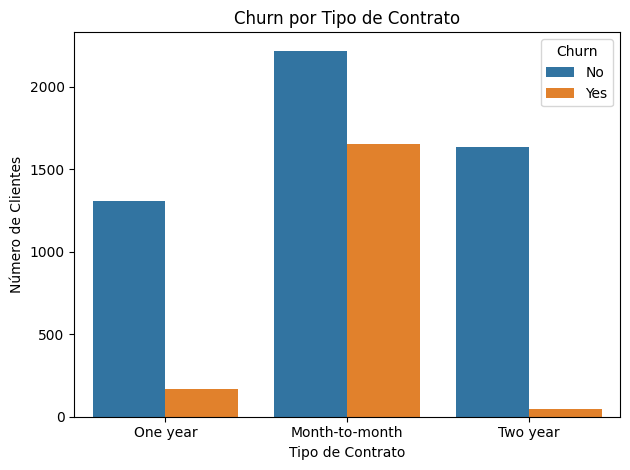

In [70]:


sns.countplot(data=df_final, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


In [80]:
df_final['SeniorCitizen'].describe()

,SeniorCitizen
count,7032.000000
mean,0.162400
std,0.368844
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [81]:
print(df_final['SeniorCitizen'].value_counts())
print(df_final['SeniorCitizen'].value_counts(normalize=True) * 100)


SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
SeniorCitizen
0    83.759954
1    16.240046
Name: proportion, dtype: float64


In [82]:
print(pd.crosstab(df_final['SeniorCitizen'], df_final['Churn']))


Churn            No   Yes
SeniorCitizen            
0              4497  1393
1               666   476


In [83]:
print(pd.crosstab(df_final['SeniorCitizen'], df_final['Churn'], normalize='index') * 100)


Churn                 No        Yes
SeniorCitizen                      
0              76.349745  23.650255
1              58.318739  41.681261


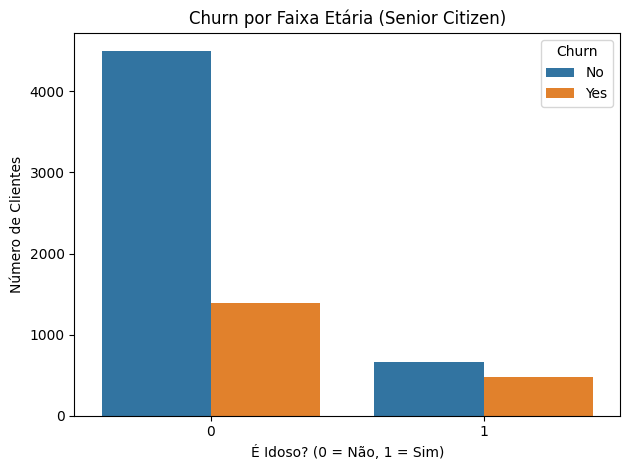

In [84]:

sns.countplot(data=df_final, x='SeniorCitizen' , hue='Churn')
plt.title('Churn por Faixa Etária (Senior Citizen)')
plt.xlabel ('É Idoso? (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

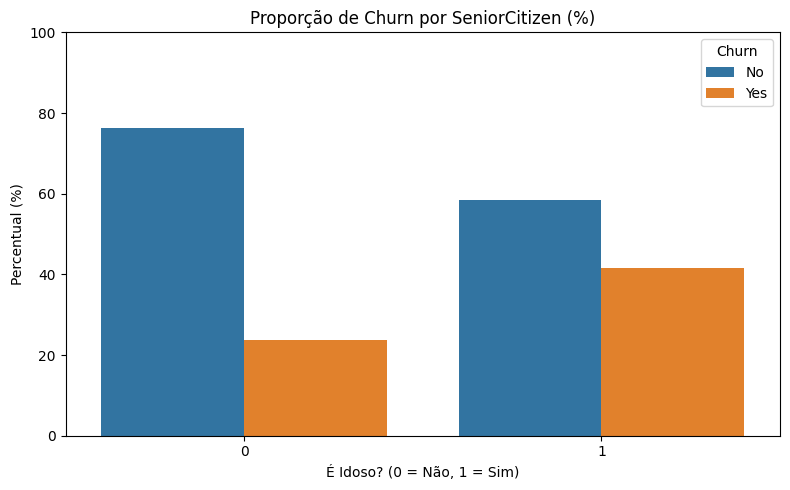

In [85]:


# Criar uma tabela com a proporção de churn por grupo SeniorCitizen
prop_churn = pd.crosstab(df_final['SeniorCitizen'], df_final['Churn'], normalize='index') * 100
prop_churn = prop_churn.reset_index()

# Deixar o gráfico no formato "long" para o seaborn
prop_churn_melt = prop_churn.melt(id_vars='SeniorCitizen', var_name='Churn', value_name='Percentual')

# Plotar
plt.figure(figsize=(8,5))
sns.barplot(data=prop_churn_melt, x='SeniorCitizen', y='Percentual', hue='Churn')

plt.title('Proporção de Churn por SeniorCitizen (%)')
plt.xlabel('É Idoso? (0 = Não, 1 = Sim)')
plt.ylabel('Percentual (%)')
plt.ylim(0, 100)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


In [86]:
df_final['gender'].describe()

,gender
count,7032
unique,2
top,Male
freq,3549


In [87]:
df_final['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [88]:
print(df_final['gender'].value_counts())
print(df_final['gender'].value_counts(normalize=True) * 100)

gender
Male      3549
Female    3483
Name: count, dtype: int64
gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64


In [89]:
print(pd.crosstab(df_final['gender'], df_final['Churn']))

Churn     No  Yes
gender           
Female  2544  939
Male    2619  930


In [90]:
print(pd.crosstab(df_final['gender'], df_final['Churn'], normalize='index') * 100)


Churn          No        Yes
gender                      
Female  73.040482  26.959518
Male    73.795435  26.204565


In [ ]:
df_final['Partner']. describe()

,Partner
count,7032
unique,2
top,No
freq,3639


In [91]:
df_final['Partner']. unique()

array(['Yes', 'No'], dtype=object)

In [92]:
# Tabela de contingência: Partner vs Churn
tabela_cruzada = pd.crosstab(df_final['Partner'], df_final['Churn'])
print(tabela_cruzada)


Churn      No   Yes
Partner            
No       2439  1200
Yes      2724   669


In [93]:
df_final['Dependents']. describe()

,Dependents
count,7032
unique,2
top,No
freq,4933


In [94]:
df_final['Dependents']. unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Tabela de contagem absoluta
pd.crosstab(df_final['Dependents'], df_final['Churn'])


Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1773,326


In [ ]:
# Tabela percentual (proporção dentro de cada grupo)
pd.crosstab(df_final['Dependents'], df_final['Churn'], normalize='index') * 100


Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.468795,15.531205


In [95]:
df_final['PaymentMethod'].describe()

,PaymentMethod
count,7032
unique,4
top,Electronic check
freq,2365


In [96]:
print(df_final['PaymentMethod'].unique())

['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [97]:
pd.crosstab(df_final['PaymentMethod'], df_final['Churn'], normalize='index') * 100


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


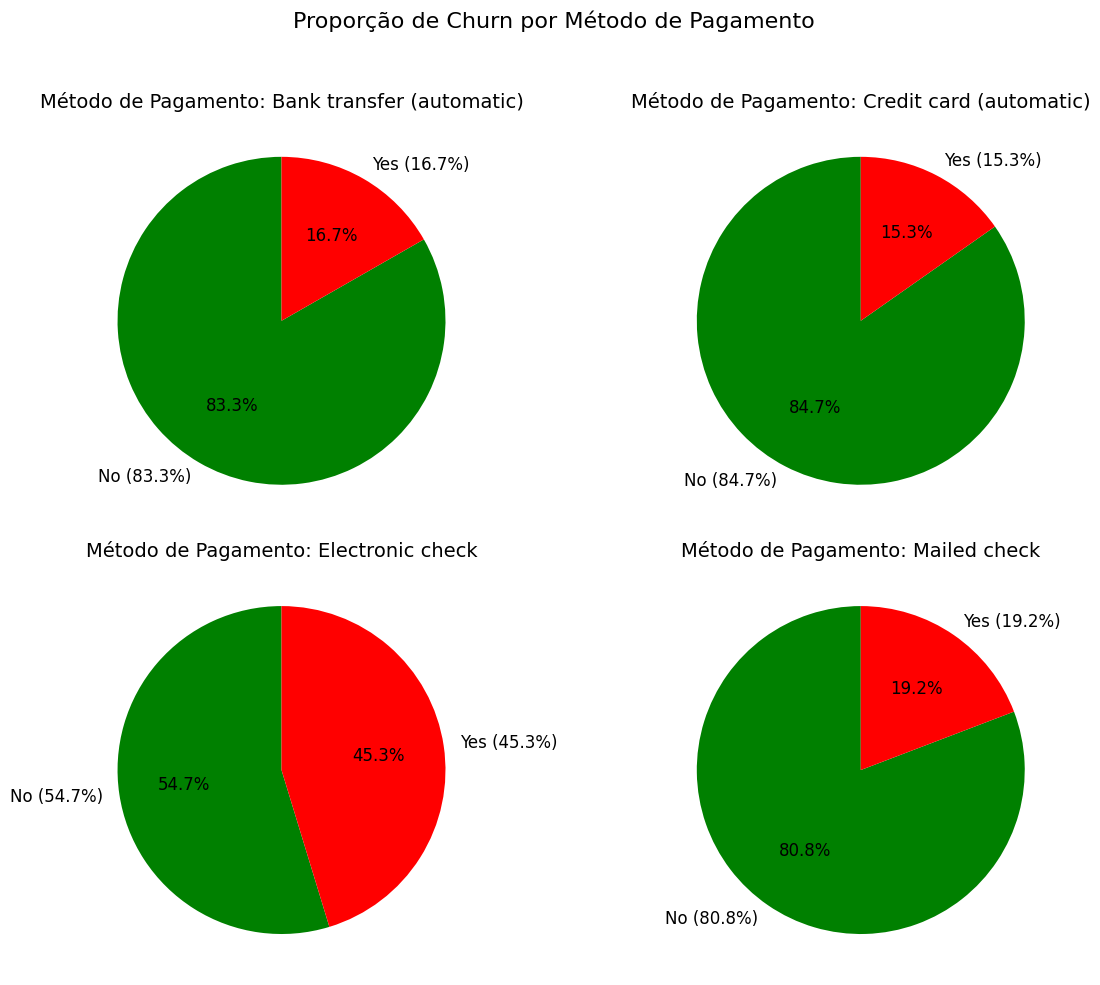

In [98]:
# Proporção de churn por método de pagamento (em %)
churn_by_payment = pd.crosstab(df_final['PaymentMethod'], df_final['Churn'], normalize='index') * 100

# Configurar o layout para 2x2 pizzas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, payment_method in enumerate(churn_by_payment.index):
    data = churn_by_payment.loc[payment_method]
    axes[i].pie(
        data,
        labels=[f'{churn} ({data[churn]:.1f}%)' for churn in data.index],
        autopct='%1.1f%%',
        colors=['green', 'red'],
        startangle=90,
        textprops={'fontsize': 12}
    )
    axes[i].set_title(f'Método de Pagamento: {payment_method}', fontsize=14)

plt.suptitle('Proporção de Churn por Método de Pagamento', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [99]:
df_final['PaperlessBilling'].describe()

,PaperlessBilling
count,7032
unique,2
top,Yes
freq,4168


In [100]:
print(df_final['PaperlessBilling'].unique())

['Yes' 'No']


In [101]:
df_final['PaperlessBilling'].value_counts()


,count
PaperlessBilling,
Yes,4168
No,2864


In [102]:
pd.crosstab(df_final['PaperlessBilling'], df_final['Churn'], normalize='index') * 100


Churn,No,Yes
PaperlessBilling,,
No,83.624302,16.375698
Yes,66.410749,33.589251


In [103]:
df_final['Charges.Monthly'].describe()

,Charges.Monthly
count,7032.000000
mean,64.798208
std,30.085974
min,18.250000
25%,35.587500
50%,70.350000
75%,89.862500
max,118.750000


In [104]:
df_final['Charges.Monthly'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

Charge_Faixa
Alto     2675
Médio    2525
Baixo    1831
Name: count, dtype: int64
Churn                No        Yes
Charge_Faixa                      
Baixo         88.367013  11.632987
Médio         70.455446  29.544554
Alto          65.981308  34.018692


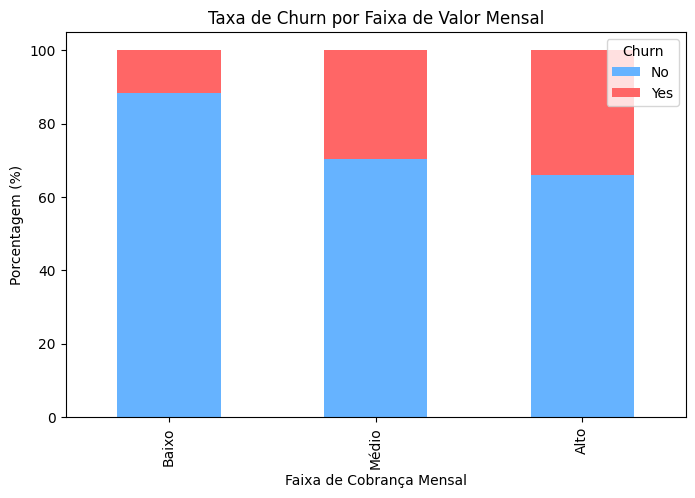

In [105]:
# Criar as faixas de valor mensal
bins = [0, 40, 80, df_final['Charges.Monthly'].max()]
labels = ['Baixo', 'Médio', 'Alto']
df_final['Charge_Faixa'] = pd.cut(df_final['Charges.Monthly'], bins=bins, labels=labels, right=False)

# Ver a distribuição nas faixas
print(df_final['Charge_Faixa'].value_counts())

# Calcular taxa de churn por faixa
churn_por_faixa = pd.crosstab(df_final['Charge_Faixa'], df_final['Churn'], normalize='index') * 100
print(churn_por_faixa)

# Visualizar com gráfico


churn_por_faixa.plot(kind='bar', stacked=True, figsize=(8,5), color=['#66b3ff', '#ff6666'])
plt.title('Taxa de Churn por Faixa de Valor Mensal')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Faixa de Cobrança Mensal')
plt.legend(title='Churn')
plt.show()


In [106]:
df_final['Charges.Total'].describe()

,Charges.Total
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [107]:
df_final['Charges.Total'].unique()

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

In [108]:
df_final['Charges.Total'].value_counts().head(10)


,count
Charges.Total,
20.20,11
19.75,9
19.90,8
19.65,8
20.05,8
45.30,7
19.55,7
20.15,6
20.25,6


In [109]:
df_final.groupby('Contract')['Charges.Total'].describe()


,count,mean,std,min,25%,50%,75%,max
Contract,,,,,,,,
Month-to-month,3875.0,1369.254581,1613.879008,18.85,160.10,679.55,2066.500,8061.50
One year,1472.0,3034.683084,2229.730075,18.80,989.35,2657.55,4859.525,8684.80
Two year,1685.0,3728.933947,2571.252806,20.35,1278.80,3623.95,5999.850,8672.45
